# Funktionen mit Parametern

Häufig hängen Funktionen nicht nur von einer Variablen $x$ ab, sondern zusätzlich von weiteren Parametern.

So enthält die Darstellung

$$
  f(x) = a\,x^2 + b\,x + c
$$

nicht nur die Variable $x$, sondern zusätzlich noch drei Parameter $a$, $b$, und $c$. Es wird dabei vorausgesetzt, dass diese Parameter für eine konkrete Funktion einmal fest gewählt werden (z.B. $a=2$, $b=-1$, $c = 5$) und sich nicht verändern.

In manchen Fällen stellt man jedoch sogenannte Kurvenscharen dar. Dann tritt in der Funktion neben $x$ meist ein weiterer Parameter $p$ auf, für den feste Werte angegeben werden, z.B.

$$
  f_p(x) = 2\,x^2 - x + p
$$

Es ist auch üblich, eine solche Parameterfunktion als

$$
  f(x;p) = 2\,x^2 - x + p
$$

zu schreiben. Die Variable nach dem ";" ist dann der Parameter.

Nutzt man `sympy`, so ist es nicht nötig, einen Parameter extra zu kennzeichnen. Man kann problemlos mit Funktionen wie

`x,b = symbols('x,b')`

`f = FE(x, 2*x**2 - x + p, name='f')`

arbeiten. Soll dann z.B. der Parameter $p=2$ gesetzt werden, so geschieht dies durch Substituion:

`f_2 = f.subs(p,2)`

Leichter ist es in vielen Fällen, stattdessen sofort

`f = FE((x,p), 2*x**2 - x + p), name='f')`

zu schreiben. Dann kann der Parameter $p=2$ einfach durch

`f(x,2)`

angegeben werden.



In [1]:
from sympy import *
init_printing()

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import pandas as pd
import numpy as np

from fun_expr import Function_from_Expression as FE

In [2]:
x,p = symbols('x,p')

f = FE((x,p), 2*x**2 -x + p, name='f')
f.equation()

<IPython.core.display.Math object>

In [3]:
f(x,2)

## Beispiel

Die Funktion $f$ hängt nicht nur von $x$ ab, sondern von einem zusätzlichen Parameter $a$. Dabei ist $a$ ein Wert, der beliebig gewählt werden kann, aber sich nicht verändert. 

$$
  f(x;a) = -5\,x^2 + a\,x + 15
$$

- Geben Sie die Graphen $y=f(x;a)$ für $a\in\{-2,-1,0,1,2\}$ an. 
  Die Variable $x$ soll im Intervall $-2\le x\le 2$ variieren.
  
- Kennzeichnen Sie für jede Parabel den Scheitelpunkt

In [4]:
x = Symbol('x')
a = Symbol('a')


f = FE((x,a), -5*x**2 + a*x + 15,name='f')
f.equation()

<IPython.core.display.Math object>

In [5]:
lx = np.linspace(-2,2)


df = pd.DataFrame(
    {
        'x': lx,
        'a=-2': f.lambdified(lx,-2),
        'a=-1': f.lambdified(lx,-1),
        'a=0': f.lambdified(lx,0),
        'a=1': f.lambdified(lx,1),
        'a=2': f.lambdified(lx,2)
    }
)
df.head()

,x,a=-2,a=-1,a=0,a=1,a=2
0,-2.000000,-1.000000,-3.000000,-5.000000,-7.000000,-9.000000
1,-1.918367,0.436068,-1.482299,-3.400666,-5.319034,-7.237401
2,-1.836735,1.805498,-0.031237,-1.867972,-3.704706,-5.541441
3,-1.755102,3.108288,1.353186,-0.401916,-2.157018,-3.912120
4,-1.673469,4.344440,2.670970,0.997501,-0.675968,-2.349438


Abgekürzt -aber undurchschaubarer- kann man hierfür auch schreiben:

In [6]:
df = pd.DataFrame(
    {
        'x': lx,
        **{f'a={a}': f.lambdified(lx,a) for a in [-2,-1,0,1,2]}
    }
)

df.head()

,x,a=-2,a=-1,a=0,a=1,a=2
0,-2.000000,-1.000000,-3.000000,-5.000000,-7.000000,-9.000000
1,-1.918367,0.436068,-1.482299,-3.400666,-5.319034,-7.237401
2,-1.836735,1.805498,-0.031237,-1.867972,-3.704706,-5.541441
3,-1.755102,3.108288,1.353186,-0.401916,-2.157018,-3.912120
4,-1.673469,4.344440,2.670970,0.997501,-0.675968,-2.349438


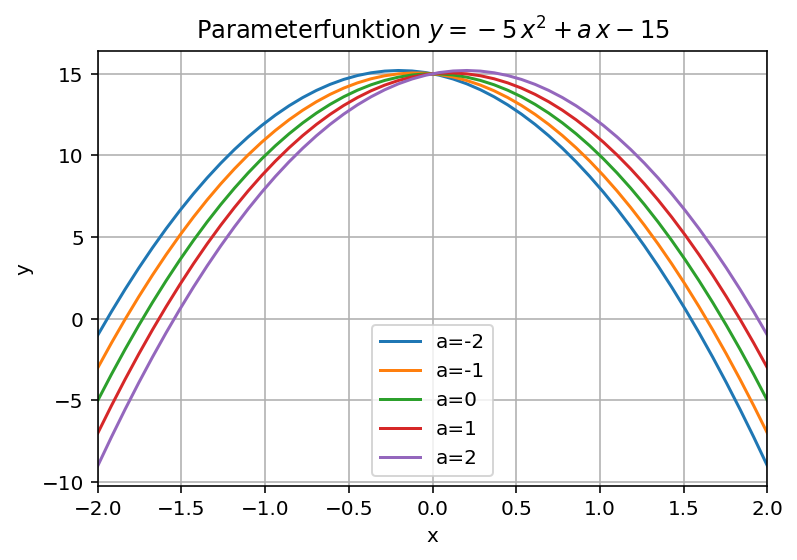

In [7]:
ax = df.plot(x='x',grid=True)

ax.set(
    ylabel='y',
    title='Parameterfunktion $y = -5\,x^2 + a\,x -15$'
)

plt.show()

**Bestimmung der Scheitelpunkte:**

In [8]:
f.equation()

<IPython.core.display.Math object>

**Erinnerung:** Die Formel für den Scheitelpunkt lautete

$$
  x_s = -\dfrac{\text{f.expr.coeff(x,1)}}{2\,\text{f.expr.coeff(x,2)}}
$$

In [9]:
x_s = FE(a, -f.expr.coeff(x,1)/(2*f.expr.coeff(x,2)),name='x_s')
x_s.equation()

<IPython.core.display.Math object>

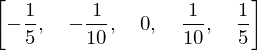

In [10]:
a_werte = [-2,-1,0,1,2]
x_s_werte = [x_s(a) for a in a_werte]
x_s_werte

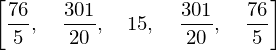

In [11]:
# Um die y_s_werte zu berechnen, muss nicht nur x_s eingesetzt werden,
# sondern zusätzlich der Wert für a

y_s_werte = [f(x,a) for x,a in zip(x_s_werte,a_werte)]
y_s_werte

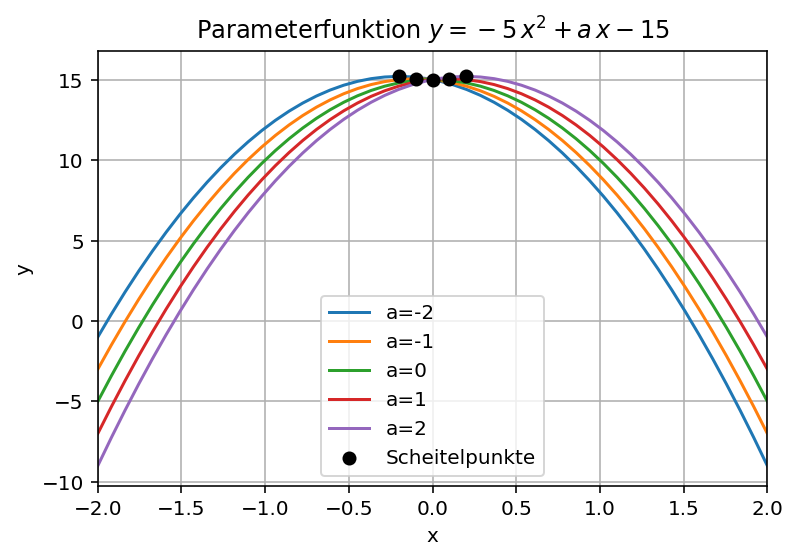

In [12]:
ax = df.plot(x='x',grid=True)

ax.set(
    ylabel='y',
    title='Parameterfunktion $y = -5\,x^2 + a\,x -15$'
)

# Die Angabe eines hohen Wertes für zorder gibt an, dass diese Punkte 
# sehr weit nach 'oben' gezeichnet werden sollen:

ax.scatter(x_s_werte,y_s_werte,c='k',label='Scheitelpunkte',zorder=10)
ax.legend()
plt.show()

## Aufgabe

Im folgenden hängt die Funktion $f$ nicht nur von der Variablen $x$ ab, sondern zusätzlich von einem *Parameter* b. Dieser wird für den Verlauf der Funktion als nicht veränderlich angesehen. 

Bestimmen Sie mittels `sympy` den Scheitelpunkt der quadratischen Funktion

$$
  f(x;b) = 15\,x^2 - 3\cdot b\cdot x + 5\,b^2-10
$$

Dabei soll $b$ eine beliebige aber fest gewählte Zahl sein. Überprüfen Sie Ihr Ergebnis für die Zahlen $b \in \{2,8,12\}$ indem Sie die Graphen $y=f(x;b)$ für $b\in\{2,8,12\}$ in einem Diagramm darstellen.

Wählen sie das Koordiantensystem sinnvoll.

In [1]:
# Ihre Lösung beginnt hier